In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import pathlib

import numpy as np
import pandas as pd
import seaborn as sns

from ikapati.data import io
from ikapati.visualization import visualize

In [4]:
species = "Potato"
data_dir = pathlib.Path("../data/processed")
train_dir = data_dir.joinpath(species)
model_dir = pathlib.Path("../models")
metadata_file_path = train_dir.joinpath("metadata.json")
base_dir = pathlib.Path.cwd()

print(f"species: {species} - train_dir: {str(train_dir)} - metadata_file_path: {str(metadata_file_path)}")

species: Potato - train_dir: ../data/processed/Potato - metadata_file_path: ../data/processed/Potato/metadata.json


In [5]:
metadata = io.read_metadata(str(metadata_file_path))
model_id = metadata["id"]

print(f"model_id: {model_id}")

model_id: bdf2d925-484f-48ff-b071-62be7c3b6abb


In [6]:
training_log_path = model_dir.joinpath(model_id, "training.log")

with open(training_log_path) as log_file:
    logs = log_file.readlines()
    training_logs = dict([log.strip().split("\t") for log in logs])
    
training_logs

{'relu': 'models/bdf2d925-484f-48ff-b071-62be7c3b6abb/2020-02-02__20_1255'}

In [7]:
list(pathlib.Path("../models", model_id).glob("*/"))

[PosixPath('../models/bdf2d925-484f-48ff-b071-62be7c3b6abb/2020-02-02__20_1255'),
 PosixPath('../models/bdf2d925-484f-48ff-b071-62be7c3b6abb/training.log')]

## ReLU

In [8]:
model_metadata_file_path = pathlib.Path("..", training_logs["relu"], "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))

In [9]:
model_metadata

{'id': 'bdf2d925-484f-48ff-b071-62be7c3b6abb',
 'start_time': '2020-02-02__20_1255',
 'arguments': {'batch_size': 64,
  'epochs': 20,
  'monitor': 'val_loss',
  'activation': 'relu',
  'early_stopping': False,
  'architecture': 'alexnet'},
 'dataset': {'id': 'bdf2d925-484f-48ff-b071-62be7c3b6abb',
  'species': 'Potato',
  'num_classes': 3,
  'class_names': ['Potato___Early_blight',
   'Potato___Late_blight',
   'Potato___healthy'],
  'created_date': '2020-02-02 18:49:05',
  'file_counts': {'train': 1721, 'test': 215, 'eval': 216}},
 'history': {'loss': [1.2655320809437678,
   0.5236138151242182,
   0.42985299229621887,
   0.4174472403067809,
   0.3328513219379462,
   0.26311533554242206,
   0.1397611076155534,
   0.11890444890237771,
   0.1212942352375159,
   0.10623736962532768,
   0.06580112093629745,
   0.05424267021366037,
   0.05762320337817073,
   0.09109535290358159,
   0.15371449599758938,
   0.07598512404813217,
   0.04543044833609691,
   0.024114651307732295,
   0.03050652738

In [10]:
history = model_metadata["history"]

In [11]:
metrics_df = visualize.create_metrics_dataframe(history)

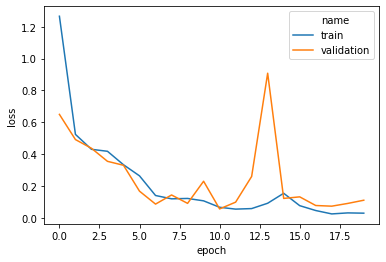

In [12]:
loss_plot = visualize.learning_curves("loss", metrics_df)

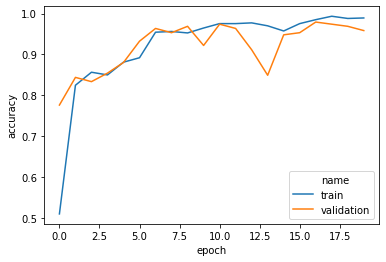

In [13]:
accuracy_plot = visualize.learning_curves("accuracy", metrics_df)